In [1]:
import mlrun

In [2]:
project  = mlrun.get_or_create_project('testing-logs','./',user_project=True)

> 2023-05-25 08:13:45,393 [info] Created and saved project testing-logs-admin: {'from_template': None, 'overwrite': False, 'context': './', 'save': True}
> 2023-05-25 08:13:45,394 [info] created project testing-logs and saved in MLRun DB


In [16]:
%%writefile func.py


import mlrun

def func(context):
    for i in range(20):
        context.logger.info(str(i)*100)
        
    return 1

Overwriting func.py


In [17]:
project.set_function(name='func',func='func.py',image='mlrun/mlrun',kind='job',handler='func')

In [18]:
project.run_function('func')

> 2023-05-25 08:25:03,051 [info] Storing function: {'name': 'func-func', 'uid': '80a582a6eb7845d28feca8d288d78622', 'db': 'http://mlrun-api:8080'}
> 2023-05-25 08:25:03,253 [info] Job is running in the background, pod: func-func-n8xwk
> 2023-05-25 08:25:08,100 [info] To track results use the CLI: {'info_cmd': 'mlrun get run 80a582a6eb7845d28feca8d288d78622 -p testing-logs-admin', 'logs_cmd': 'mlrun logs 80a582a6eb7845d28feca8d288d78622 -p testing-logs-admin'}
> 2023-05-25 08:25:08,100 [info] Or click for UI: {'ui_url': 'https://dashboard.default-tenant.app.testing-logs-issue.iguazio-cd2.com/mlprojects/testing-logs-admin/jobs/monitor/80a582a6eb7845d28feca8d288d78622/overview'}
> 2023-05-25 08:25:08,101 [info] run executed, status=completed: {'name': 'func-func'}
final state: completed


project,uid,iter,start,state,name,labels,inputs,parameters,results,artifacts
testing-logs-admin,...88d78622,0,May 25 08:25:07,completed,func-func,v3io_user=adminkind=jobowner=adminmlrun/client_version=1.3.0mlrun/client_python_version=3.9.16host=func-func-n8xwk,,,return=1,


> 2023-05-25 08:25:11,353 [info] run executed, status=completed: {'name': 'func-func'}


In [39]:
%%writefile workflow.py

from kfp import dsl
from mlrun.platforms import auto_mount
import os
import sys
import mlrun


#each pipe creates 20 jobs that runs one by one change the pipe number to select how much pipelines you want to run in parllel
#for example if you set pipe_num=3, it will run 3 pipelines in parller and each one of them will run 20 jobs and in total it will run 3*20=60 jobs

pipe_num = 5
def kfpipeline():
    with dsl.ParallelFor([i for i in range(pipe_num)]) as item:
        step_1 = mlrun.run_function('func')
        step_2 = mlrun.run_function('func').after(step_1)
        step_3 = mlrun.run_function('func').after(step_2)
        step_4 = mlrun.run_function('func').after(step_3)
        step_5 = mlrun.run_function('func').after(step_4)
        step_6 = mlrun.run_function('func').after(step_5)
        step_7 = mlrun.run_function('func').after(step_6)
        step_8 = mlrun.run_function('func').after(step_7)
        step_9 = mlrun.run_function('func').after(step_8)
        step_10 = mlrun.run_function('func').after(step_9)
        step_11 = mlrun.run_function('func').after(step_10)
        step_12 = mlrun.run_function('func').after(step_11)
        step_13 = mlrun.run_function('func').after(step_12)
        step_14 = mlrun.run_function('func').after(step_13)
        step_15 = mlrun.run_function('func').after(step_14)
        step_16 = mlrun.run_function('func').after(step_15)
        step_17 = mlrun.run_function('func').after(step_16)
        step_18 = mlrun.run_function('func').after(step_17)
        step_19 = mlrun.run_function('func').after(step_18)
        step_20 = mlrun.run_function('func').after(step_19)

Overwriting workflow.py


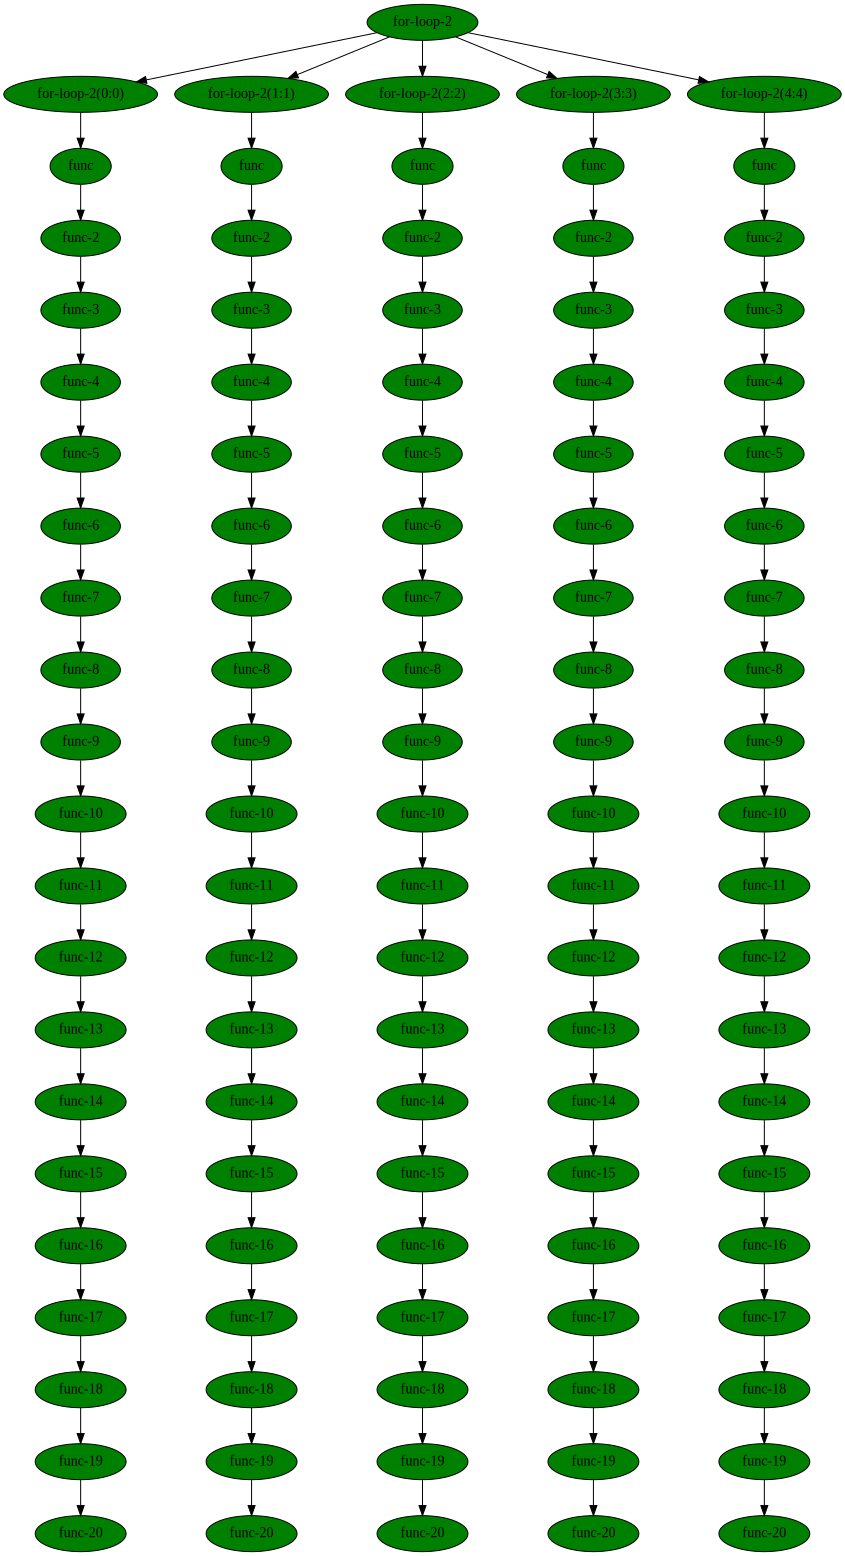

uid,start,state,name,parameters,results
...51789969,May 25 12:23:50,completed,func,,return=1
...377bf2fc,May 25 12:23:50,completed,func,,return=1
...5c5955d5,May 25 12:23:49,completed,func,,return=1
...6be948cb,May 25 12:23:38,completed,func,,return=1
...2be535bb,May 25 12:23:10,completed,func,,return=1
...4eb82861,May 25 12:23:09,completed,func,,return=1
...0b466389,May 25 12:23:09,completed,func,,return=1
...b426d4c5,May 25 12:22:57,running,func,,return=1
...c724e181,May 25 12:22:56,running,func,,return=1
...4f2e19f9,May 25 12:22:28,completed,func,,return=1


59f2b3cb-07ed-4166-a4a5-36e9a3dfa99c

In [41]:
project.run(workflow_path='workflow.py',watch=True)